In [51]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [27]:
# Read the data into Pandas dataframe and display the first 5 rows
data = pd.read_csv("Data/loan_prediction.csv")

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
# Identifying Non useful columns and dropping them
data = data.drop("Loan_ID", axis = 1)

In [29]:
# Identifying null values in all the features
print(data.isnull().sum())

# Exploring the data 
data.describe()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [30]:
# Filling the missing values of numerical data

'''for loan amount using median value since they have utliers
 and for loan_amount_term and credit_history using mode value since they are categorical'''

# data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace = True)

data.fillna({'LoanAmount': data['LoanAmount'].median()}, inplace = True)
data.fillna({'Loan_Amount_Term': data['Loan_Amount_Term'].mode()[0], 'Credit_History': data['Credit_History'].mode()[0], 
            }, inplace = True)
# data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode(), inplace = True )
# data['Credit_History'].fillna(data['Credit_History'].mode(), inplace = True)



In [31]:
# Filling the categorical data with mode value
data.fillna({'Gender' : data['Gender'].mode()[0] ,
             'Married': data['Married'].mode()[0] , 
             'Dependents' : data['Dependents'].mode()[0],
             'Self_Employed' : data['Self_Employed'].mode()[0]}, inplace = True)

In [32]:
# Re confirming if we left with any null values
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
data.shape

(614, 12)

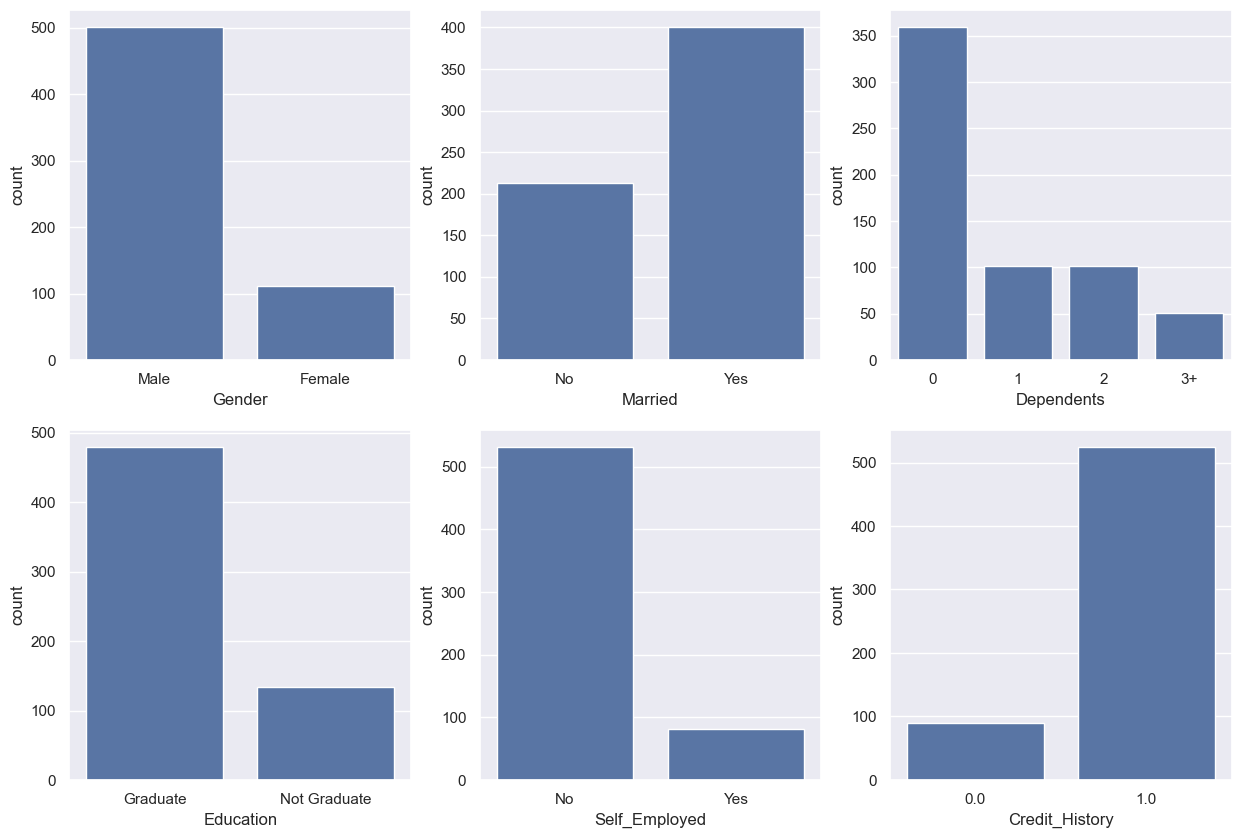

In [34]:
sns.set(style="darkgrid")

# Plot count distributions for categorical variables
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=data)

plt.subplot(2, 3, 2)
sns.countplot(x='Married', data=data)

plt.subplot(2, 3, 3)
sns.countplot(x='Dependents', data=data)

plt.subplot(2, 3, 4)
sns.countplot(x='Education', data=data)

plt.subplot(2, 3, 5)
sns.countplot(x='Self_Employed', data=data)

plt.subplot(2, 3, 6)
sns.countplot(x='Credit_History', data=data)

plt.show()

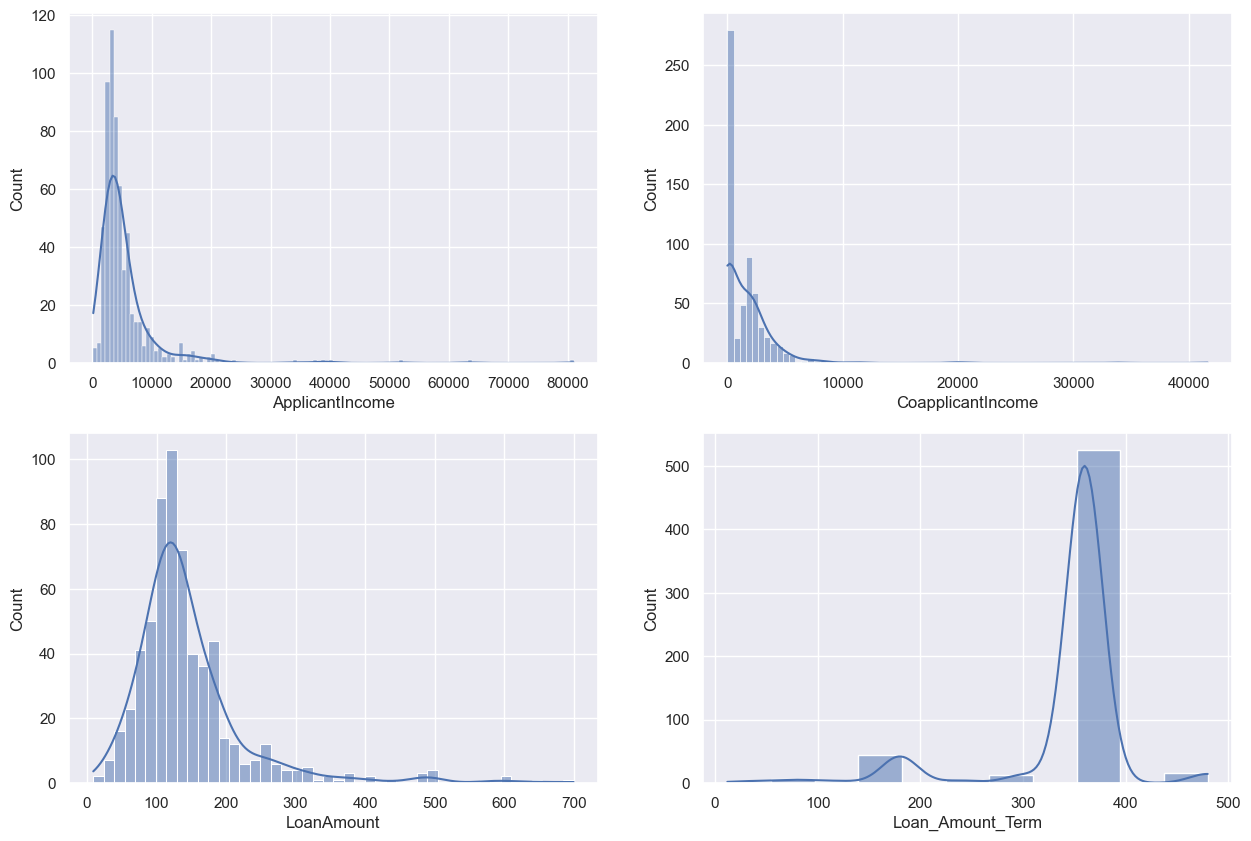

In [35]:
# Plot distribution for numeric variables
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['ApplicantIncome'], kde=True)

plt.subplot(2, 2, 2)
sns.histplot(data['CoapplicantIncome'], kde=True)

plt.subplot(2, 2, 3)
sns.histplot(data['LoanAmount'], kde=True)

plt.subplot(2, 2, 4)
sns.histplot(data['Loan_Amount_Term'], kde=True)

plt.show()

(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

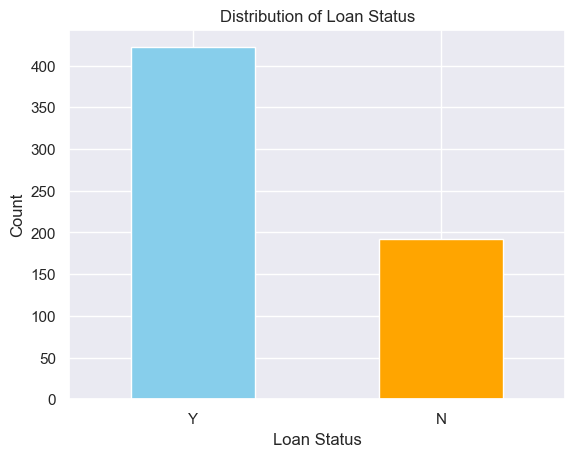

In [36]:
data['Loan_Status'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

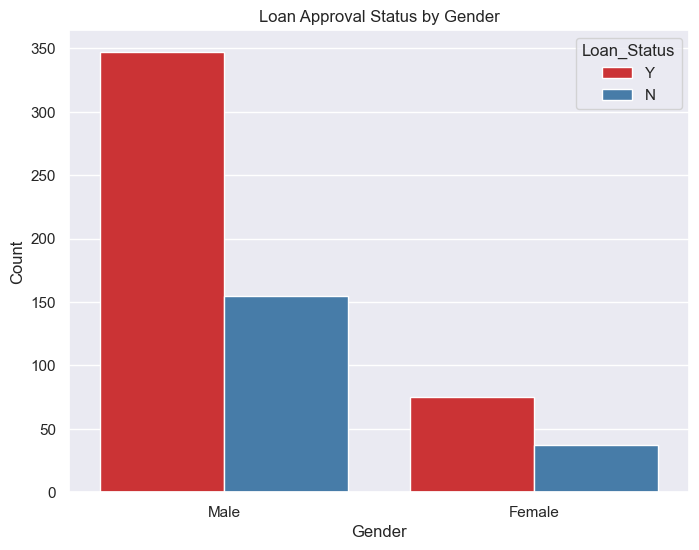

In [37]:
#Plotting loan approval status by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=data, palette='Set1')
plt.title('Loan Approval Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

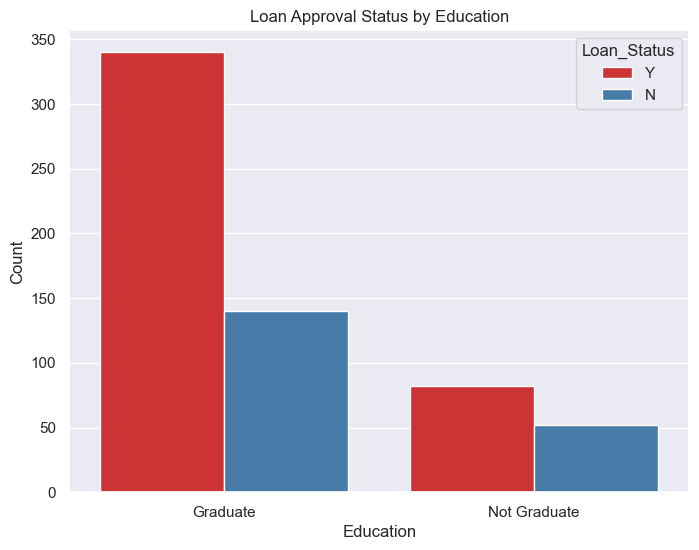

In [38]:
# Plotting loan approval status by education
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Loan_Status', data=data, palette='Set1')
plt.title('Loan Approval Status by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

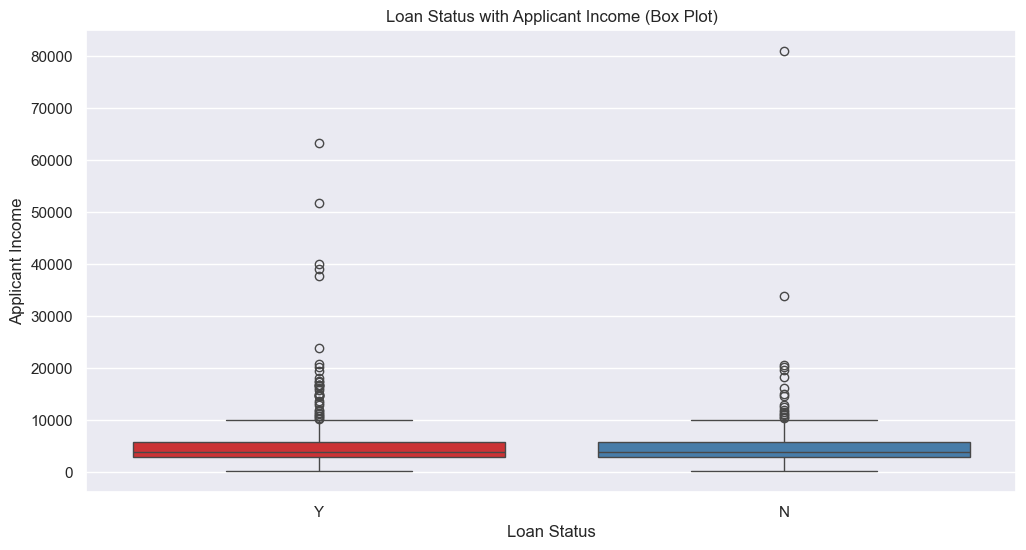

In [39]:
# Loan status with applicant income
plt.figure(figsize=(12, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data, palette='Set1')
plt.title('Loan Status with Applicant Income (Box Plot)')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()


In [40]:
# Removing outliers from Applicant Income

Q1 = data['ApplicantIncome'].quantile(0.25)
Q3 = data['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data = data[(data['ApplicantIncome'] > lower_limit) & (data['ApplicantIncome'] < upper_limit)]

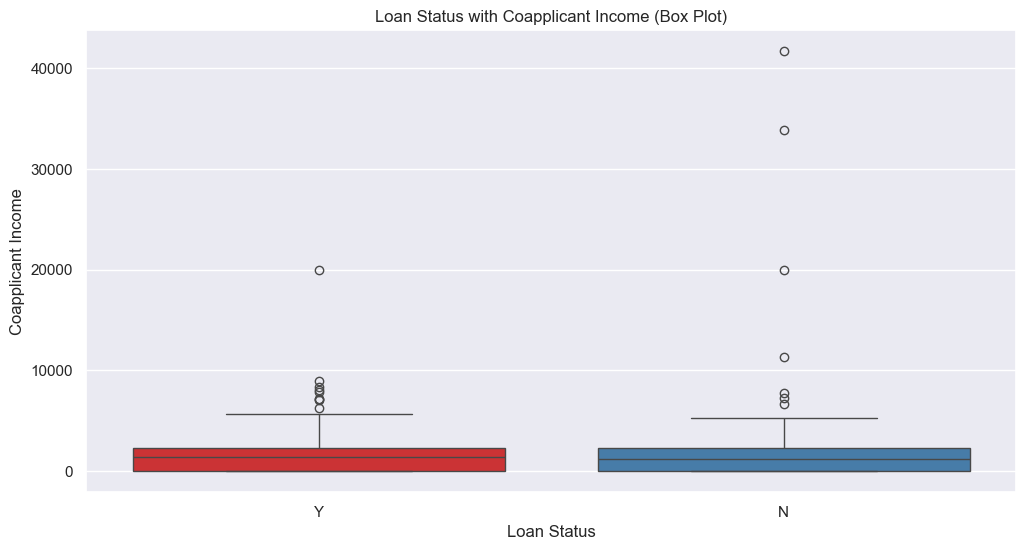

In [41]:
# Loan status with Co-applicant income
plt.figure(figsize=(12, 6))
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=data, palette='Set1')
plt.title('Loan Status with Coapplicant Income (Box Plot)')
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income')
plt.show()

In [42]:
# Similar to Applicant Income, we will remove outliers from Coapplicant Income

Q1 = data['CoapplicantIncome'].quantile(0.25)
Q3 = data['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data = data[(data['CoapplicantIncome'] > lower_limit) & (data['CoapplicantIncome'] < upper_limit)]

In [43]:
# Categorical columns need to be converted to numerical values
categ_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

data = pd.get_dummies(data, columns= categ_cols)

In [44]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,Y,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,N,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,Y,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,Y,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True


In [45]:
# Drop the target variable from the dataset and assign it to variable y
X = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 18)

In [46]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [47]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [48]:

# Predict on test data and print the accuracy score
y_pred = model.predict(X_test)
print(" Accuracy of Random Forest Classifier is : ", accuracy_score(y_test, y_pred))


 Accuracy of Random Forest Classifier is :  0.7545454545454545
